### IMPORTING LIBRARIES

In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATASET 

In [267]:
df = pd.read_excel("employee_dataset.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [269]:
df.shape

(3998, 39)

In [270]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


## DATA CLEANING

### Converting all column names to Lower Cases

In [271]:
df.columns = df.columns.str.lower()

### Checking for Null Values using a FOR Loop

In [272]:
NULL = []
for i in df:
    value = df[i].isin([-1, 'NaN' , 0]).sum()
    NULL.append([f'{i} : {value}'])
print(*NULL, sep = "\n")

['unnamed: 0 : 0']
['id : 0']
['salary : 0']
['doj : 0']
['dol : 0']
['designation : 0']
['jobcity : 461']
['gender : 0']
['dob : 0']
['10percentage : 0']
['10board : 350']
['12graduation : 0']
['12percentage : 0']
['12board : 359']
['collegeid : 0']
['collegetier : 0']
['degree : 0']
['specialization : 0']
['collegegpa : 0']
['collegecityid : 0']
['collegecitytier : 2797']
['collegestate : 0']
['graduationyear : 1']
['english : 0']
['logical : 0']
['quant : 0']
['domain : 246']
['computerprogramming : 868']
['electronicsandsemicon : 2854']
['computerscience : 3096']
['mechanicalengg : 3763']
['electricalengg : 3837']
['telecomengg : 3624']
['civilengg : 3956']
['conscientiousness : 0']
['agreeableness : 0']
['extraversion : 0']
['nueroticism : 0']
['openess_to_experience : 0']


### Checking for Duplicate Values

In [273]:
df.duplicated().sum()

#From the dataset there are no Duplicate values in the Dataset

0

In [274]:
df.columns

Index(['unnamed: 0', 'id', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegegpa', 'collegecityid', 'collegecitytier',
       'collegestate', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Converting the 10 and 12 Boards using Binning Technique

In [275]:
def conv_board(board):
    CBSE = ['cbse' , 'all india board' , 'central board of secondary education, new delhi' , 'cbese']
    ICSE = ['isc', 'icse', 'isc board', 'isce', 'cicse','isc board , new delhi']
    
    for i in df[board]:
        if i in CBSE:
            df[board].replace(i,'CBSE' , inplace=True)
            
        elif i in ICSE:
            df[board].replace(i,'ICSE' , inplace=True)
            
        elif i == 0 or i == 'n/a':
            df[board].replace(i,'n/a' , inplace=True)
            
        else:
            df[board].replace(i,'State' , inplace=True)

    return df[board].unique()

In [276]:
print(conv_board('10board'))

['State' 'n/a' 'ICSE' 'CBSE']


In [277]:
print(conv_board('12board'))

['State' 'n/a' 'ICSE' 'CBSE']


### Extracting yyyy from DOB Column

In [278]:
df['dob'] = df['dob'].dt.year
df['dob']

0       1990
1       1989
2       1992
3       1989
4       1991
        ... 
3993    1987
3994    1992
3995    1991
3996    1992
3997    1991
Name: dob, Length: 3998, dtype: int64

### DATA TYPE CONVERSION

**1. DOL - Date of Leaving**

- The survey was conducted back in 2015 and therefore making an assumption that the respondents with PRESENT for DOL actually left the company at the end of the year. 

In [279]:
df['dol'].replace('present','2015-12-31', inplace = True)

In [280]:
df['dol'] = pd.to_datetime(df['dol'])

In [281]:
# With the above assumption, there are instances where DOJ is greater than DOL. So checking how many instances and dropping them.

dates = df[(df['dol'] < df['doj'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(df.shape)

DOL is earlier than DOJ for 40 observations.
(3998, 39)


In [282]:
df = df.drop(df[~(df['dol'] > df['doj'])].index)
print(df.shape)

(3943, 39)


### DROPPING COLUMNS WITH NO VALUE

- The following columns describes subjects which are optional and they have a large number of -1 or null values. Hence we will be dropping the columns out of Analysis.

1. electronicsandsemicon
2. computerscience
3. mechanicalengg
4. electricalengg
5. telecomengg
6. civilengg
7. computerprogramming

In [283]:
df.drop(['unnamed: 0', 'id', 'collegeid', 'collegecityid','computerprogramming','electronicsandsemicon','computerscience','mechanicalengg','electricalengg','telecomengg','civilengg'], axis = 1 , inplace = True)

In [284]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,graduationyear,english,logical,quant,domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990,84.3,State,2007,...,2011,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989,85.4,State,2007,...,2012,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992,85.0,State,2010,...,2014,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989,85.6,State,2007,...,2011,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,State,2008,...,2012,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [285]:
df.dtypes

salary                            int64
doj                      datetime64[ns]
dol                      datetime64[ns]
designation                      object
jobcity                          object
gender                           object
dob                               int64
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
collegetier                       int64
degree                           object
specialization                   object
collegegpa                      float64
collegecitytier                   int64
collegestate                     object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
conscientiousness               float64
agreeableness                   float64


### TENURE

In [286]:
df['Tenure'] = (df['dol'].dt.year - df['doj'].dt.year)
df['Tenure']

0       3
1       2
2       1
3       4
4       1
       ..
3992    1
3993    1
3995    2
3996    1
3997    2
Name: Tenure, Length: 3943, dtype: int64

### Job Joining Age

In [287]:
df['Join_age'] = (df['doj'].dt.year - df['dob'])
df['Join_age']

0       22
1       24
2       22
3       22
4       23
        ..
3992    24
3993    24
3995    22
3996    22
3997    22
Name: Join_age, Length: 3943, dtype: int64

### Specialization 

In [288]:
df.specialization.unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [289]:
specialization_map = \
{'electronics and communication engineering' : 'ECE',
 'computer science & engineering' : 'CSE',
 'information technology' : 'CSE' ,
 'computer engineering' : 'CSE',
 'computer application' : 'CSE',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EEE',
 'electronics & telecommunications' : 'ECE',
 'electrical engineering' : 'EEE',
 'electronics & instrumentation eng' : 'ECE',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EIE',
 'information science engineering' : 'CSE',
 'instrumentation and control engineering' : 'ECE',
 'electronics engineering' : 'ECE',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'ECE',
 'computer science and technology' : 'CSE',
 'telecommunication engineering' : 'ECE',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EIE',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CSE',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CSE',
 'metallurgical engineering' : 'ME',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'ECE',
 'electrical and power engineering' : 'EEE',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CSE',
 'embedded systems technology' : 'ECE',
 'power systems and automation' : 'EEE',
 'computer and communication engineering' : 'CSE',
 'information science' : 'CSE',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'ECE',
 'polymer technology' : 'other',
 'electronics' : 'ECE'}

In [290]:
df['specialization'] = df['specialization'].map(specialization_map)

### DESIGNATION

In [291]:
l=[]

for i in df['designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
        
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
        
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
        
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
        
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
        
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
        
    elif('analyst' in i):
        l.append('analyst')
        
    elif('consultant' in i):
        l.append('consultant')
        
    elif('executive' in i):
        l.append('executive')
        
    elif('designer' in i):
        l.append('designer')
        
    else:
        l.append('others')

In [292]:
df['designations']=l
df['designations'].value_counts()

engineer      1969
developer      657
others         532
analyst        396
manager        122
associate       65
executive       60
trainee         57
senior          43
designer        23
consultant      19
Name: designations, dtype: int64

In [293]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,quant,domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Join_age,designations
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990,84.3,State,2007,...,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,3,22,others
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989,85.4,State,2007,...,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,2,24,manager
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992,85.0,State,2010,...,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,1,22,engineer
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989,85.6,State,2007,...,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4,22,others
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,State,2008,...,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,23,others


### JOB CITY

In [294]:
df['jobcity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3992              Rajkot
3993          New Delhi 
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: jobcity, Length: 3943, dtype: object

In [295]:
df['jobcity'].replace(-1,np.nan,inplace=True)
df['jobcity'].dropna(inplace=True)

In [296]:
freq_jobcity= df['jobcity'].value_counts()[:10]

In [297]:
freq_jobcity

Bangalore    623
Noida        361
Hyderabad    329
Pune         285
Chennai      269
New Delhi    195
Gurgaon      193
Mumbai       108
Kolkata       98
Jaipur        45
Name: jobcity, dtype: int64

### PERSONALITY TEST SCORE

In [298]:
df['Personality_ts']=((df['conscientiousness']+df['agreeableness']+df['extraversion']+df['nueroticism']+df['openess_to_experience'])/5)
df['Personality_ts'].head()

0    0.644560
1    0.328220
2    0.390060
3   -0.256000
4   -0.453574
Name: Personality_ts, dtype: float64

### Dropping Unnecessary Columns

In [299]:
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Tenure',
       'Join_age', 'designations', 'Personality_ts'],
      dtype='object')

In [300]:
df.drop(['dob','doj','dol','designation','12graduation','graduationyear','english','quant','logical','domain','conscientiousness','agreeableness','extraversion', 'nueroticism','openess_to_experience'], axis = 1 , inplace = True)

In [301]:
df.gender.unique()

array(['f', 'm'], dtype=object)

In [302]:
df.degree.unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [303]:
degrees_map = \
{'B.Tech/B.E.' : 'Bachelors',
 'MCA' : 'Masters',
 'M.Tech./M.E.' : 'Masters' ,
 'M.Sc. (Tech.)' : 'Masters'}

df['degree'] = df['degree'].map(degrees_map)

In [304]:
df.collegecitytier.unique()

array([0, 1], dtype=int64)

In [305]:
df.head()

,salary,jobcity,gender,10percentage,10board,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,Tenure,Join_age,designations,Personality_ts
0,420000,Bangalore,f,84.3,State,95.8,State,2,Bachelors,CSE,78.00,0,Andhra Pradesh,3,22,others,0.644560
1,500000,Indore,m,85.4,State,85.0,State,2,Bachelors,ECE,70.06,0,Madhya Pradesh,2,24,manager,0.328220
2,325000,Chennai,f,85.0,State,68.2,State,2,Bachelors,CSE,70.00,0,Uttar Pradesh,1,22,engineer,0.390060
3,1100000,Gurgaon,m,85.6,State,83.6,State,1,Bachelors,CSE,74.64,1,Delhi,4,22,others,-0.256000
4,200000,Manesar,m,78.0,State,76.8,State,2,Bachelors,ECE,73.90,0,Uttar Pradesh,1,23,others,-0.453574


### SAVING THE CLEANED DATASET TO A NEW FILENAME

In [306]:
df.to_csv('cleaned_employee_dataset.csv')

### UNIVARIATE ANALYSIS

### FOR SALARY COLUMN

In [307]:
colors = ['#CD6155','#5499C7','#AF7AC5','#48C9B0','#52BE80','#F4D03F','#FA8072','#800020','#808000','#7393B3']

In [308]:
df['salary'].describe()

count    3.943000e+03
mean     3.082562e+05
std      2.117631e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.725000e+05
max      4.000000e+06
Name: salary, dtype: float64

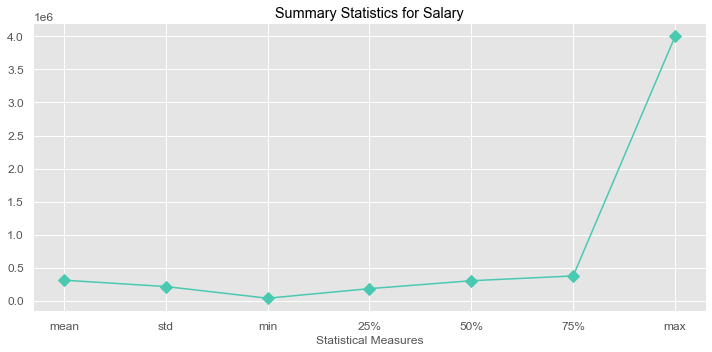

In [309]:
plt.style.use('ggplot')
df['salary'].describe()[1:].plot(color = colors[3], figsize =(10,5),marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

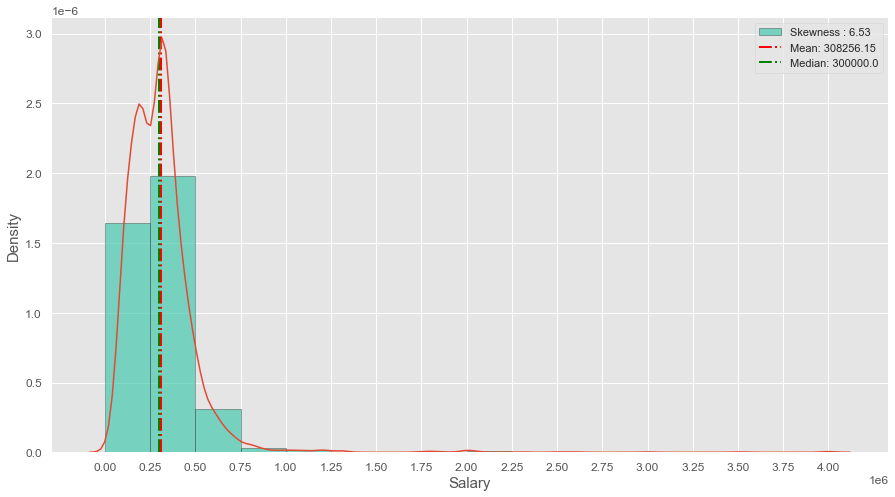

In [310]:
bins = np.arange(0, df['salary'].max()+250000, 250000)
plt.figure(figsize = (15,8))
plt.hist(df['salary'], ec = 'k',
        color = colors[3], bins = bins,
        label = f"Skewness : {round(df['salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['salary'].mean(), label = f"Mean: {round(df['salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['salary'].median(), label = f"Median: {round(df['salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
sns.kdeplot(df['salary'])
plt.legend()
plt.show()

<AxesSubplot:xlabel='salary'>

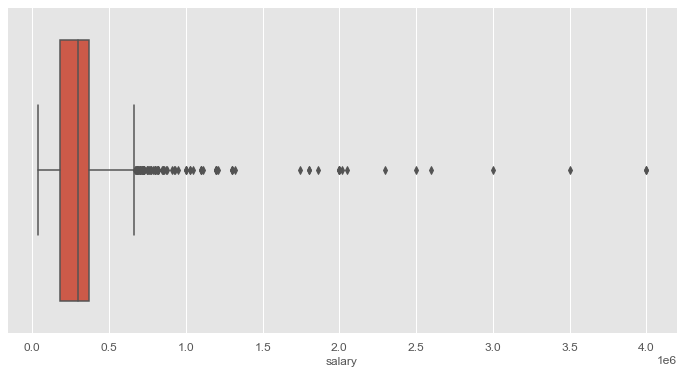

In [311]:
plt.figure(figsize=(12,6))
sns.boxplot(df['salary'])

- **CONCLUSIONS:**

1. Summary Plot: There is high variations in salary.
2. Histogram: The data is positively and highly skewed towards the right side
3. Box Plot: Presence of Outliers and there are a lot of datapoint with high salaries.

### College GPA

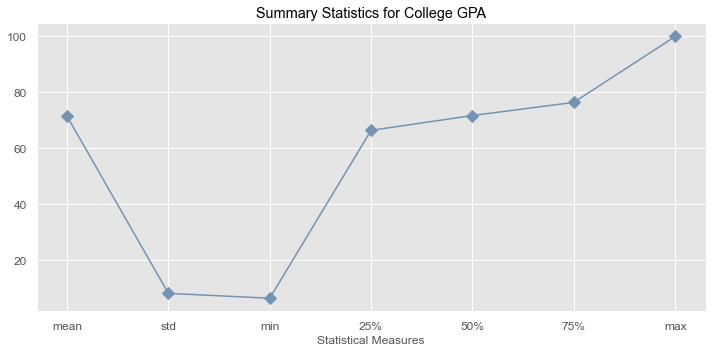

In [312]:
df['collegegpa'].describe()[1:].plot(color = colors[9],figsize =(10,5),marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

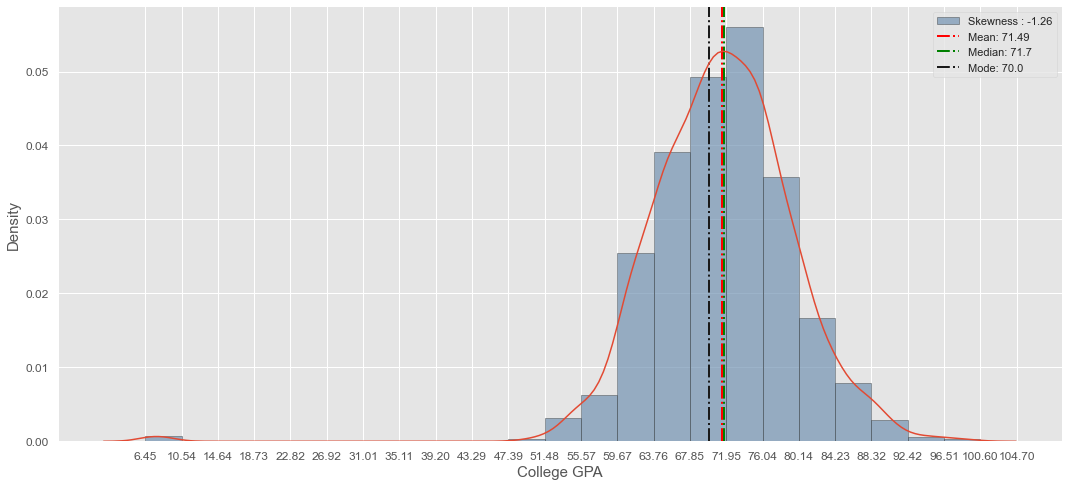

In [313]:
bins = np.arange(df['collegegpa'].min(), df['collegegpa'].max()+df['collegegpa'].std(), 
                 df['collegegpa'].std()/2)
plt.figure(figsize = (18,8))
plt.hist(df['collegegpa'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(df['collegegpa'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['collegegpa'].mean(), label = f"Mean: {round(df['collegegpa'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['collegegpa'].median(), label = f"Median: {round(df['collegegpa'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['collegegpa'].mode()[0], label = f"Mode: {round(df['collegegpa'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['collegegpa'])
plt.legend()
plt.show()

<AxesSubplot:xlabel='collegegpa'>

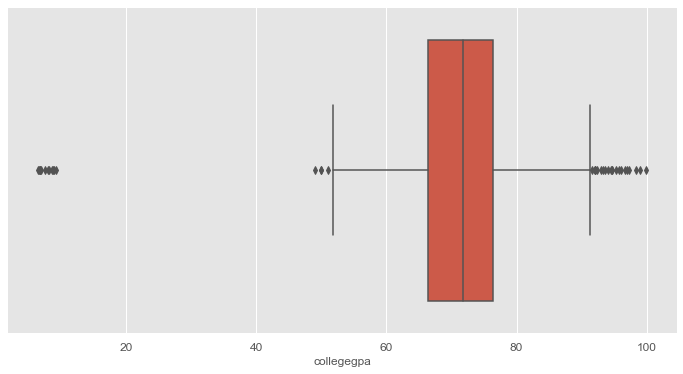

In [314]:
plt.figure(figsize=(12,6))
sns.boxplot(df['collegegpa'])

- **CONCLUSIONS:**

1. Summary Plot: About 75% if the students GPA was close to 80%
2. Histogram: Majority of the students GPA was between 65% - 72%. Average GPA about 72%
3. Box Plot: Presence of Outliers and there are both low extreme values and high extreme values.

### TENURE

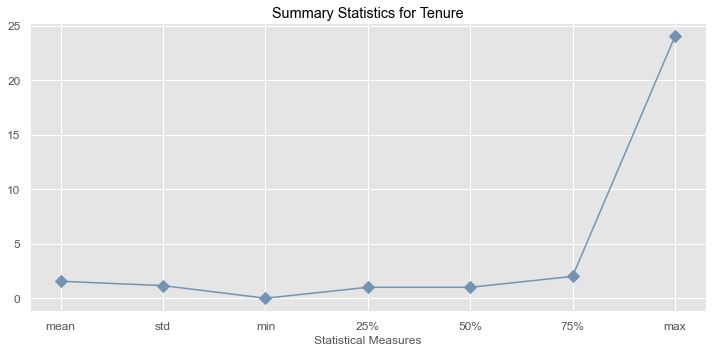

In [315]:
df['Tenure'].describe()[1:].plot(color = colors[9],figsize =(10,5),marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

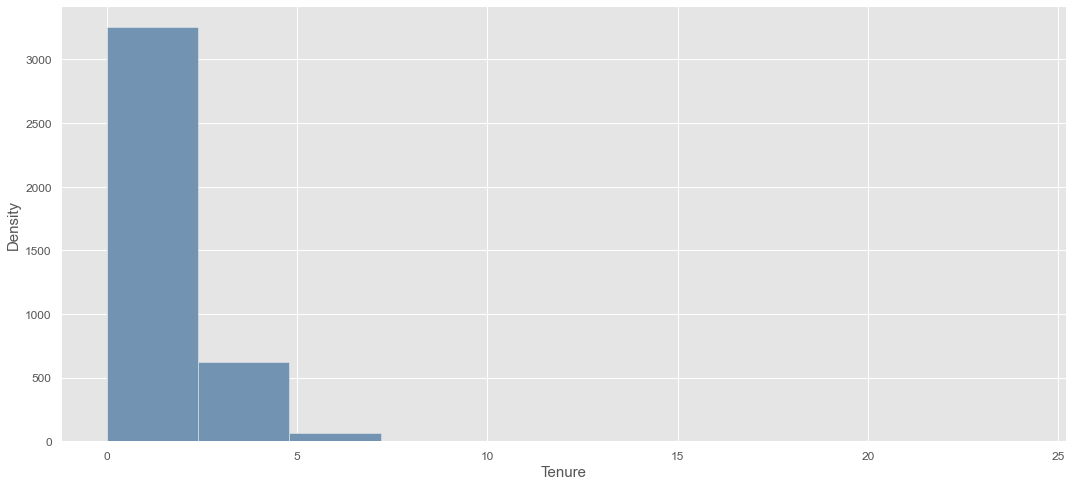

In [316]:
plt.figure(figsize = (18,8))
plt.hist(df['Tenure'],color = colors[9]) 
plt.xlabel('Tenure', size = 15)
plt.ylabel('Density', size = 15)
plt.show()

<AxesSubplot:xlabel='Tenure'>

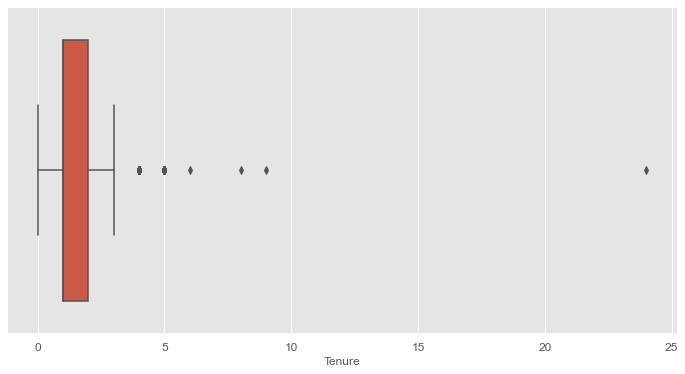

In [317]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Tenure'])

- **Conclusions:**

1. Summary Plot : The range for experience is 3 years.
2. Histogram : The data is positively skewed i.e there exists larger number of respondents with low tenure. 50% data points are below 1.5 years. Average tenure is 1.5 years. 
3. Box Plot : There are few values with large tenure i.e outliers

### AGE

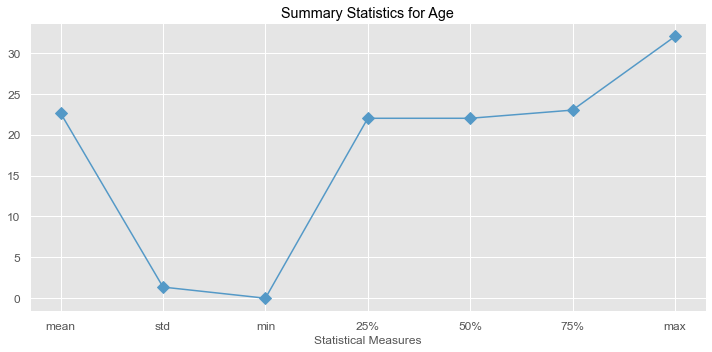

In [318]:
df['Join_age'].describe()[1:].plot(color = colors[1],figsize =(10,5), marker = 'D', markersize = 8)
plt.title('Summary Statistics for Age')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

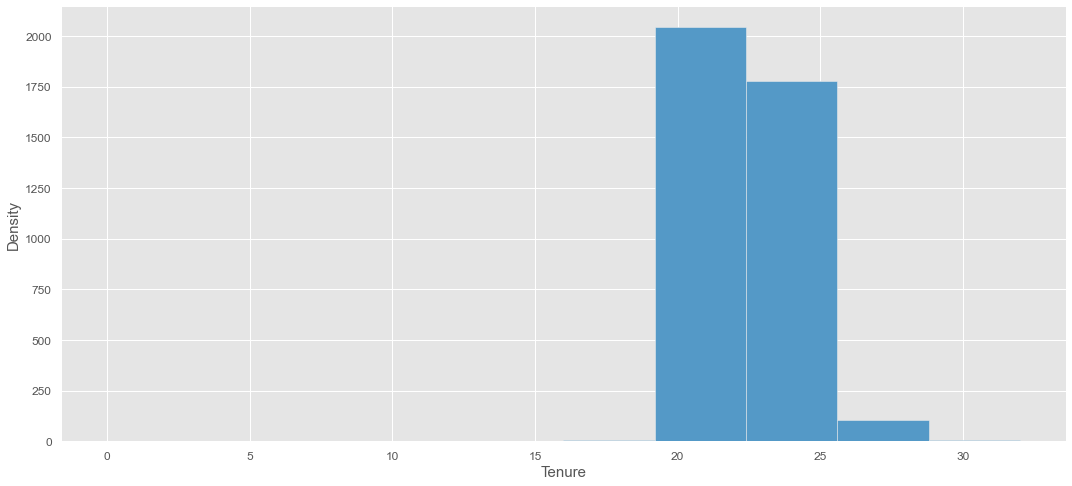

In [319]:
plt.figure(figsize = (18,8))
plt.hist(df['Join_age'],color = colors[1]) 
plt.xlabel('Tenure', size = 15)
plt.ylabel('Density', size = 15)
plt.show()

<AxesSubplot:xlabel='Join_age'>

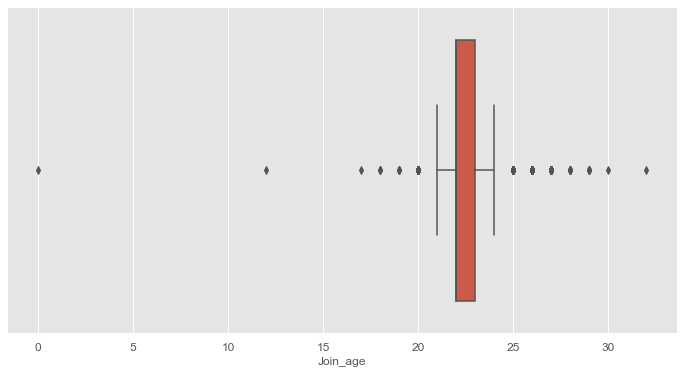

In [320]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Join_age'])

- **Conclusions:**

1. Summary Plot : About 75% of the students are less than 26 years old
2. Histogram : Majority of the students age were between 22 - 25.
3. Box Plot : There are few values students with high age and lower age i.e outliers.

## CATEGORICAL COLUMNS

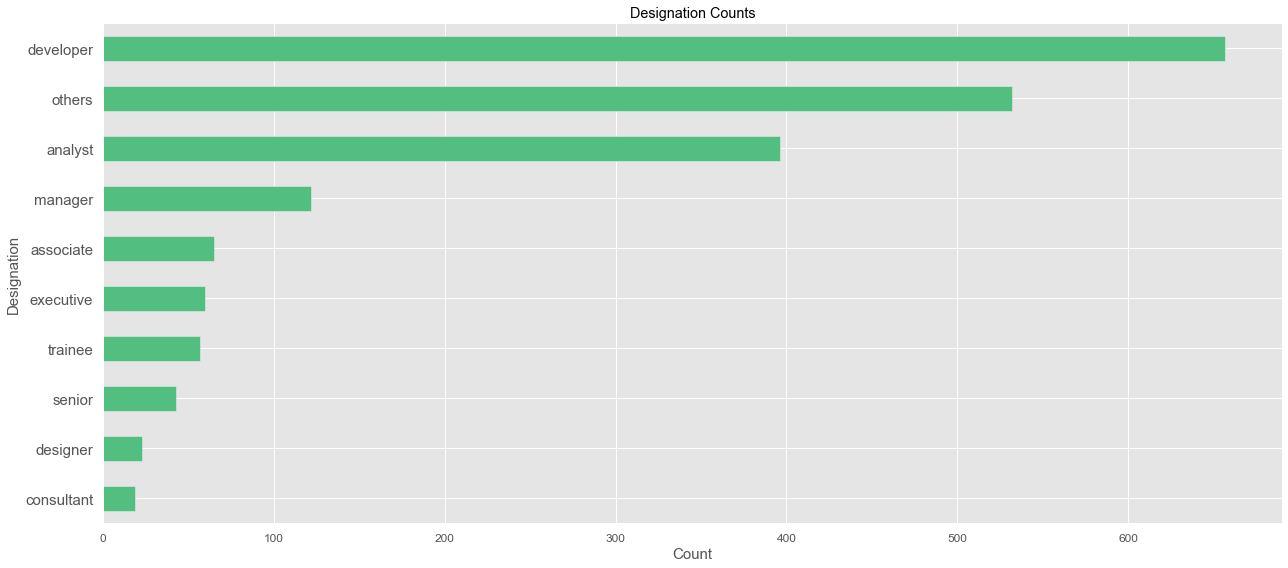

In [321]:
df['designations'].value_counts()[1:].sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[4],
                                                                       title = 'Designation Counts',
                                                                       figsize = (18,8))

plt.yticks(size = 15)
plt.ylabel('Designation', size = 15)
plt.xlabel('Count', size = 15)
plt.tight_layout()
plt.show()

- **Conclusions:**

Developer seems to be the more compared to other designations followed by the analyst and the managers. 

### JOB_CITY

In [322]:
freq_jobcity

Bangalore    623
Noida        361
Hyderabad    329
Pune         285
Chennai      269
New Delhi    195
Gurgaon      193
Mumbai       108
Kolkata       98
Jaipur        45
Name: jobcity, dtype: int64

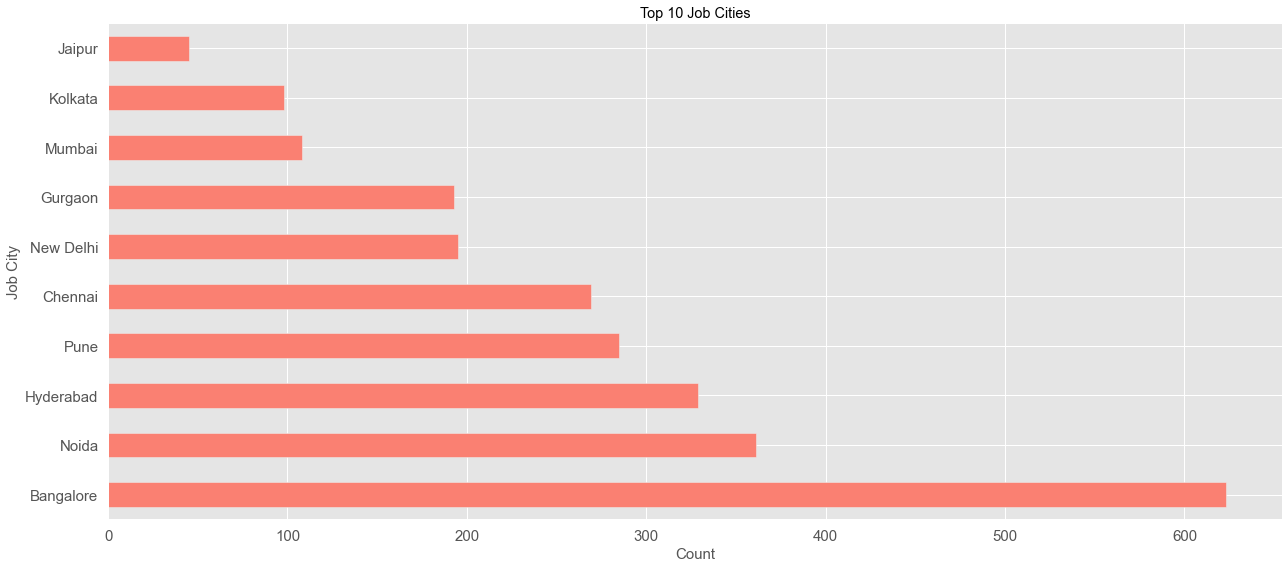

In [323]:
freq_jobcity.plot(kind = 'barh',color = colors[6],title = 'Top 10 Job Cities',figsize = (18,8))

plt.yticks(size = 15)
plt.xticks(size = 15)

plt.ylabel('Job City', size = 15)
plt.xlabel('Count', size = 15)
plt.tight_layout()
plt.show()

- **Conclusions:**

The most favourable city for job placements is Bangalore followed by Noida and Hyderabad whereas Jaipur is the least favourable among the 10 cities.

### GENDER

In [324]:
df['gender'].replace('f','Female', inplace = True)
df['gender'].replace('m', 'Male', inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

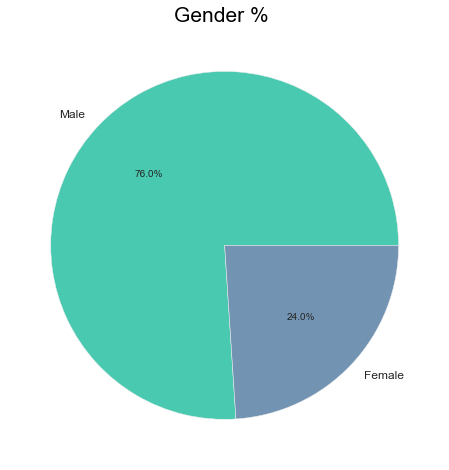

In [325]:
plt.figure(figsize=(20,8))
plt.title("Gender % ", fontsize=21)
plt.pie(df['gender'].value_counts().tolist(), labels = df['gender'].value_counts().index, autopct='%1.1f%%',colors = [colors[3],colors[9]])
plt.show

- **Conclusions:**

The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.

### DEGREE

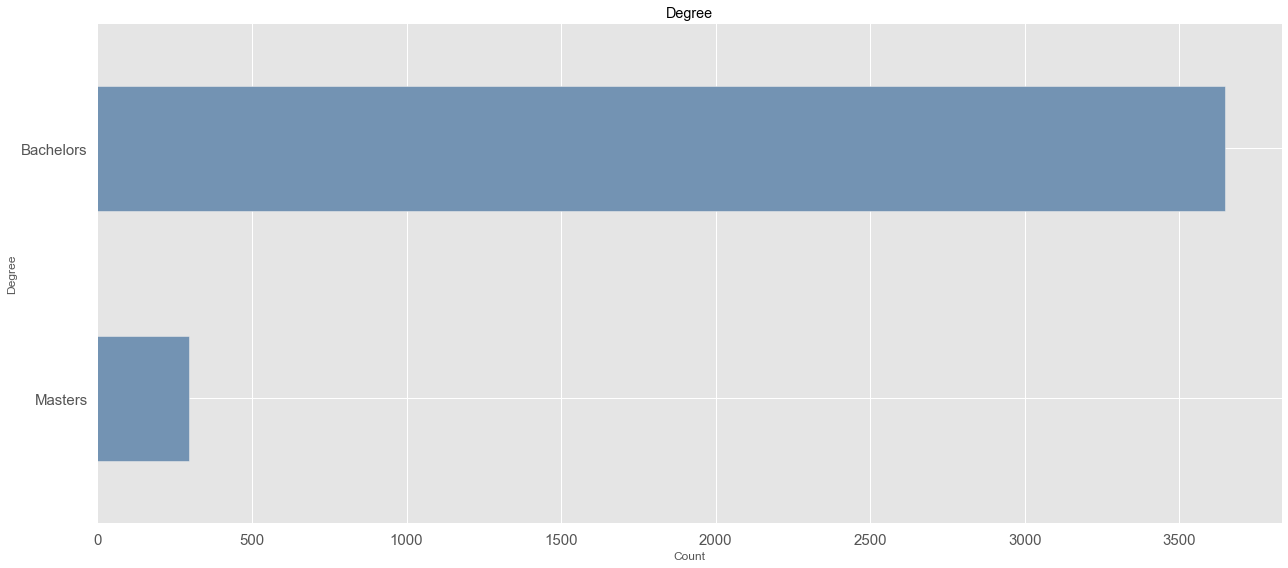

In [326]:
df['degree'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[9],
                                                                       title = 'Degree',
                                                                       figsize = (18,8))

plt.yticks(size = 15)
plt.xticks(size = 15)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

- **Conclusions:**

Most of the students have done their graduation in Bachelors compared to Masters degree.

### COLLEGE TIER

<function matplotlib.pyplot.show(close=None, block=None)>

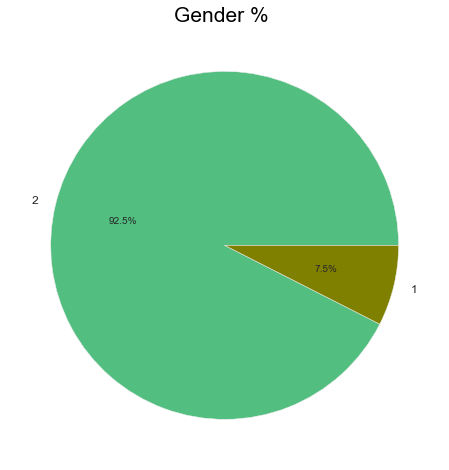

In [327]:
plt.figure(figsize=(20,8))
plt.title("Gender % ", fontsize=21)
plt.pie(df['collegetier'].value_counts().tolist(), labels = df['collegetier'].value_counts().index, autopct='%1.1f%%',colors = [colors[4],colors[8]])
plt.show

- **Conclusions:**

92.5% of the college students preferred belongs to Tier 1 Colleges.

### COLLEGE STATE

In [328]:
df.collegestate.unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

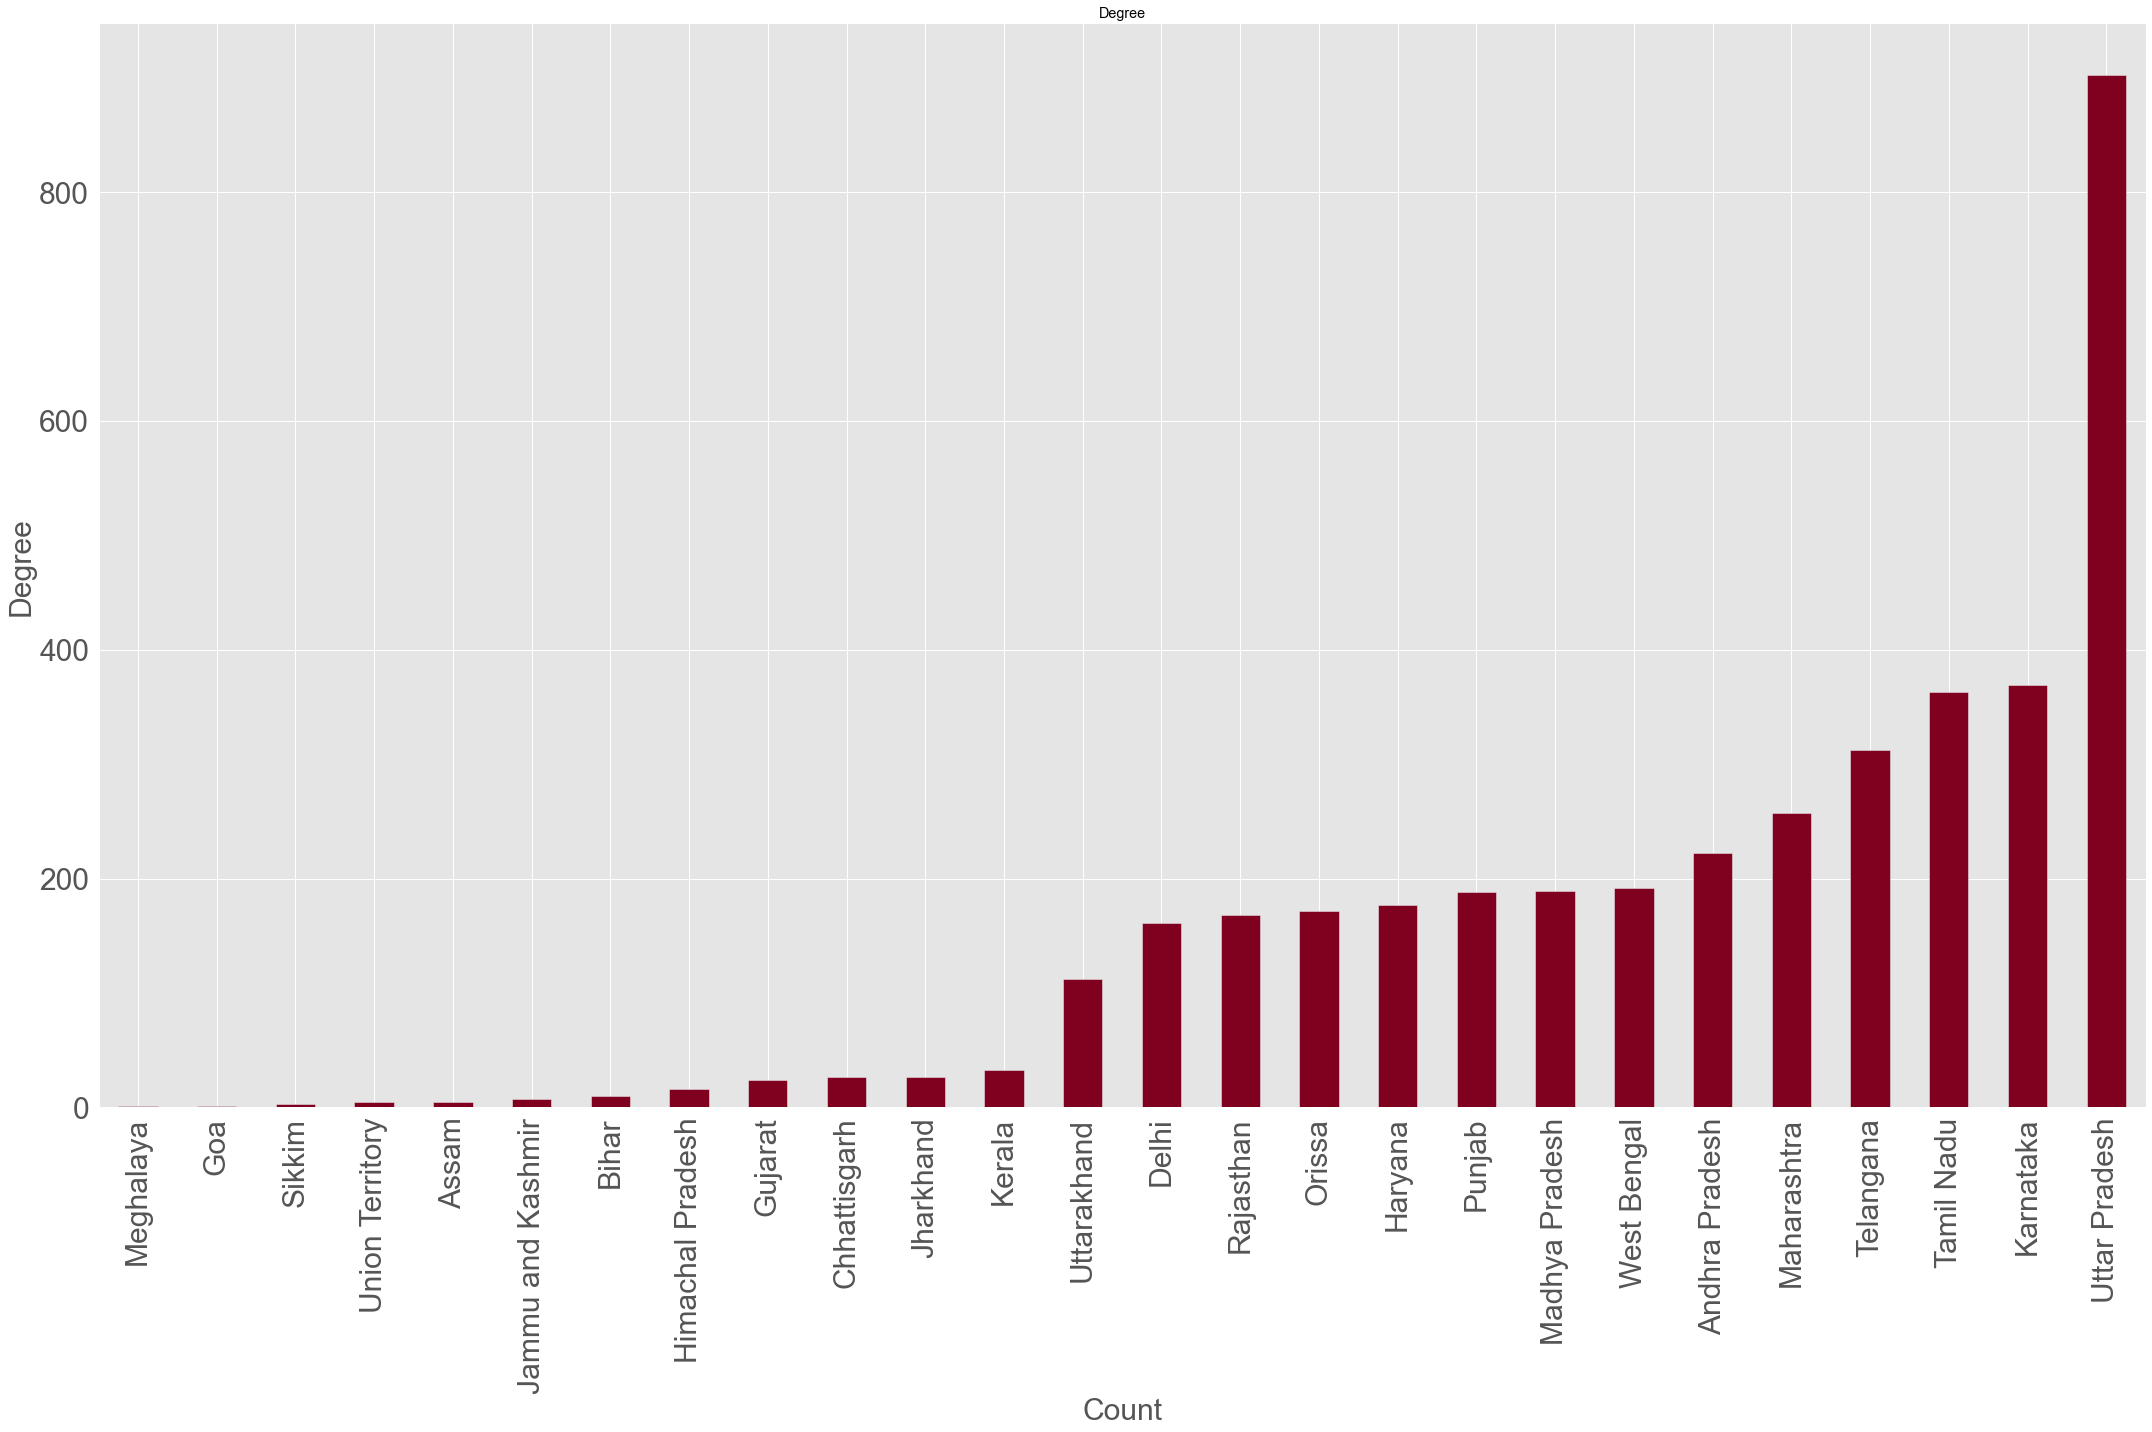

In [329]:
df['collegestate'].value_counts().sort_values(ascending = True).plot(kind = 'bar',
                                                                       color = colors[7],
                                                                       title = 'Degree',
                                                                       figsize = (30,20))

plt.yticks(size = 30)
plt.xticks(size = 30)
plt.ylabel('Degree', size = 30)
plt.xlabel('Count', size = 30)
plt.tight_layout()
plt.show()

- **Conclusions:**

Most number of Students did their Bachelors degree in the state of "Uttar Pradesh".

Can also conclude as an Hypothesis. Uttar Pradesh offers the best educational system compated to other states in India.

### OUTLIER REMOVAL

In [330]:
df.columns

Index(['salary', 'jobcity', 'gender', '10percentage', '10board',
       '12percentage', '12board', 'collegetier', 'degree', 'specialization',
       'collegegpa', 'collegecitytier', 'collegestate', 'Tenure', 'Join_age',
       'designations', 'Personality_ts'],
      dtype='object')

In [331]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [332]:
columns_num = ['salary','10percentage','12percentage','collegegpa','Tenure','Join_age','Personality_ts']
df_copy = df.copy()

In [333]:
for cols in columns_num:
    #exctracting upperbound and lowerbound
    lowerbound,upperbound = outlier_treatment(df_copy[cols])

    #dropping the outlier
    df_copy = df_copy.drop(df_copy[(df_copy[cols] < lowerbound) | (df_copy[cols] > upperbound)].index)

In [334]:
print(f'Number of observations with outliers : {df.shape[0]}')
print(f'Number of observations without outliers : {df_copy.shape[0]}')

Number of observations with outliers : 3943
Number of observations without outliers : 3173


## BI-VARIATE ANALYSIS

### DESIGNATION VS SALARY

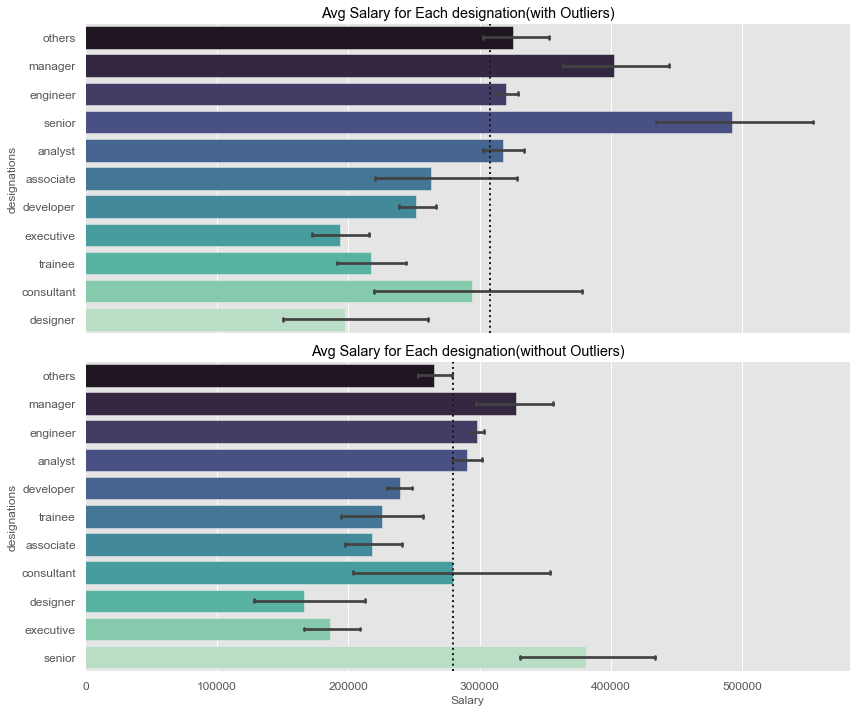

In [335]:
fig, ax = plt.subplots(2, 1, figsize = (12,10), sharex = True)

sns.barplot(x = 'salary', y = 'designations',
           data = df,
           palette = 'mako',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')

ax[0].set_title('Avg Salary for Each designation(with Outliers)')
ax[0].set_xlabel('')


sns.barplot(x = 'salary', y = 'designations',
           data = df_copy,
           palette = 'mako',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df_copy['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')

ax[1].set_title('Avg Salary for Each designation(without Outliers)')
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()


- **CONCLUSION :** 

Bar plot shows the maximum salary for each designation. 
Senior Engineer has the highest salary among other designations.

### GENDER VS SALARY

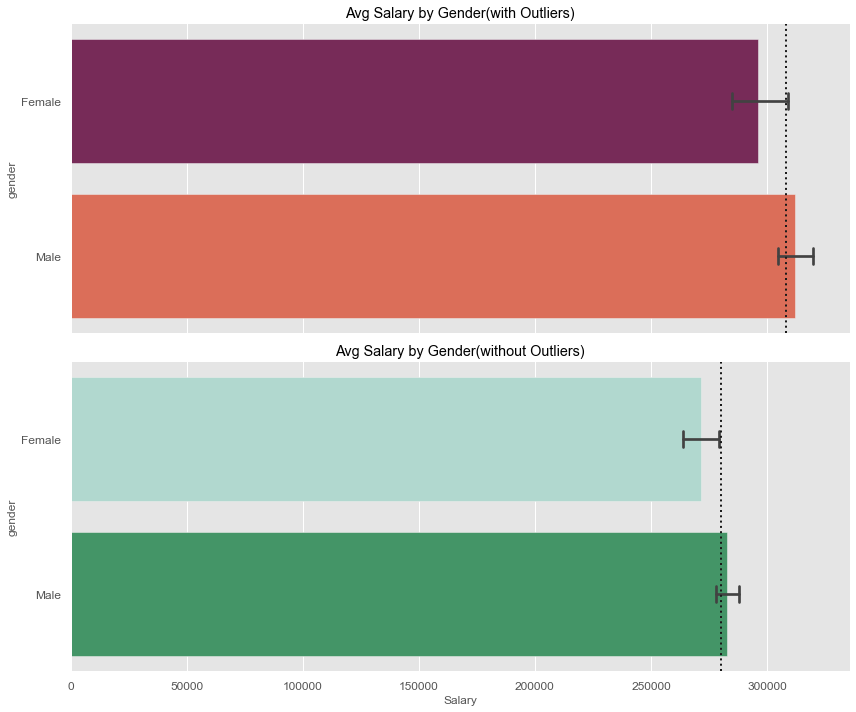

In [336]:
fig, ax = plt.subplots(2, 1, figsize = (12,10), sharex = True)

sns.barplot(x = 'salary', y = 'gender',
           data = df,
           palette = 'rocket',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')

ax[0].set_title('Avg Salary by Gender(with Outliers)')
ax[0].set_xlabel('')


sns.barplot(x = 'salary', y = 'gender',
           data = df_copy,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])

ax[1].axvline(df_copy['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')

ax[1].set_title('Avg Salary by Gender(without Outliers)')
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='gender', ylabel='salary'>

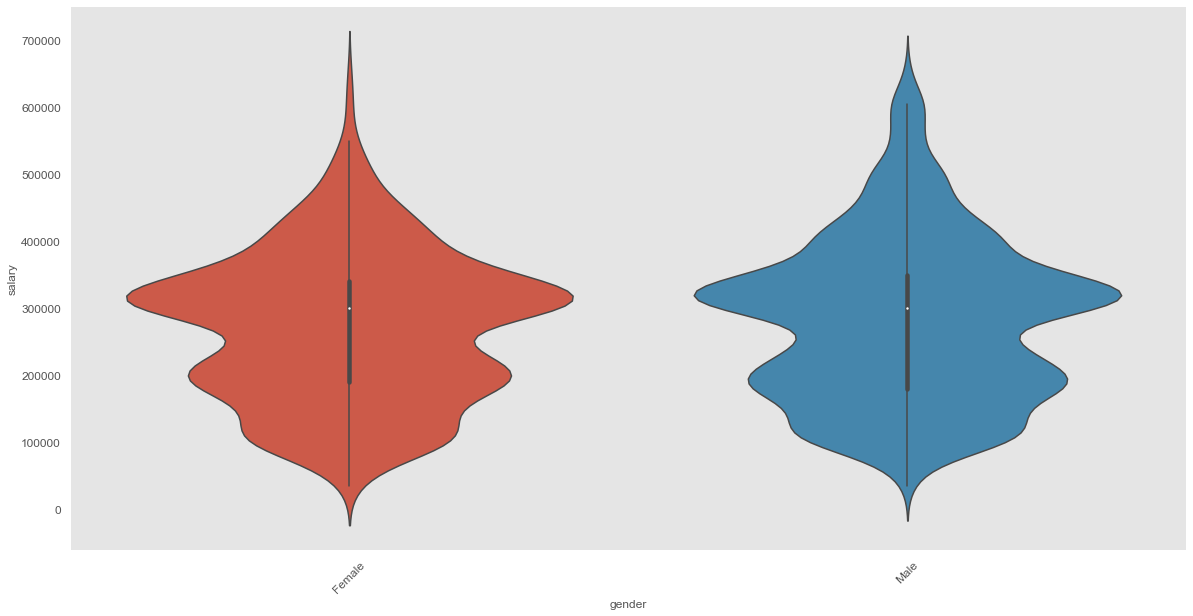

In [337]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
sns.violinplot(x = 'gender', y = 'salary', data = df_copy)

- **CONCLUSION :** 

The average salary for both males and females is almost the same. This implies that there is no gender bias in terms of salary.

### Relationship between Salary and College States

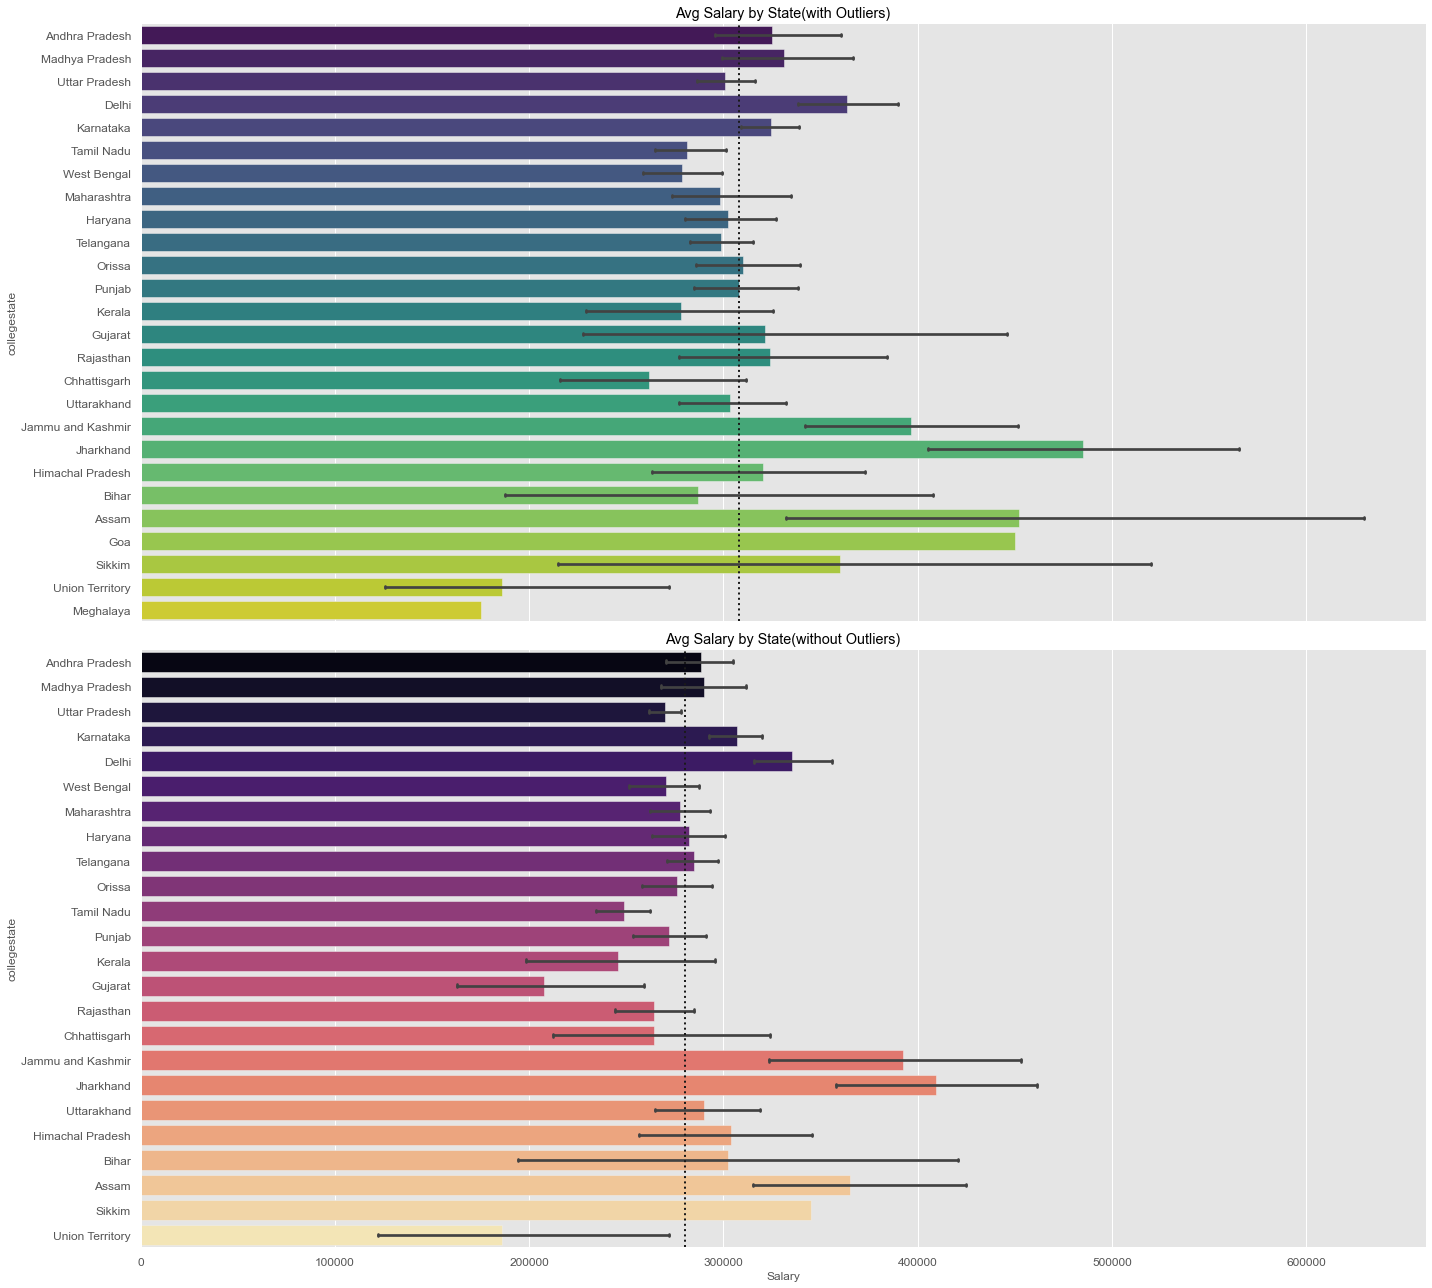

In [338]:
fig, ax = plt.subplots(2, 1, figsize = (20,18), sharex = True)

sns.barplot(x = 'salary', y = 'collegestate',
           data = df,
           palette = 'viridis',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')

ax[0].set_title('Avg Salary by State(with Outliers)')
ax[0].set_xlabel('')


sns.barplot(x = 'salary', y = 'collegestate',
           data = df_copy,
           palette = 'magma',
           capsize = 0.1,
           ax = ax[1])

ax[1].axvline(df_copy['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')

ax[1].set_title('Avg Salary by State(without Outliers)')
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()

- **CONCLUSION :** 

The average salary from Students from Jharkhand was more compared to other States.

### RELATIONSHIP BETWEEN SALARY AND 10Percentage

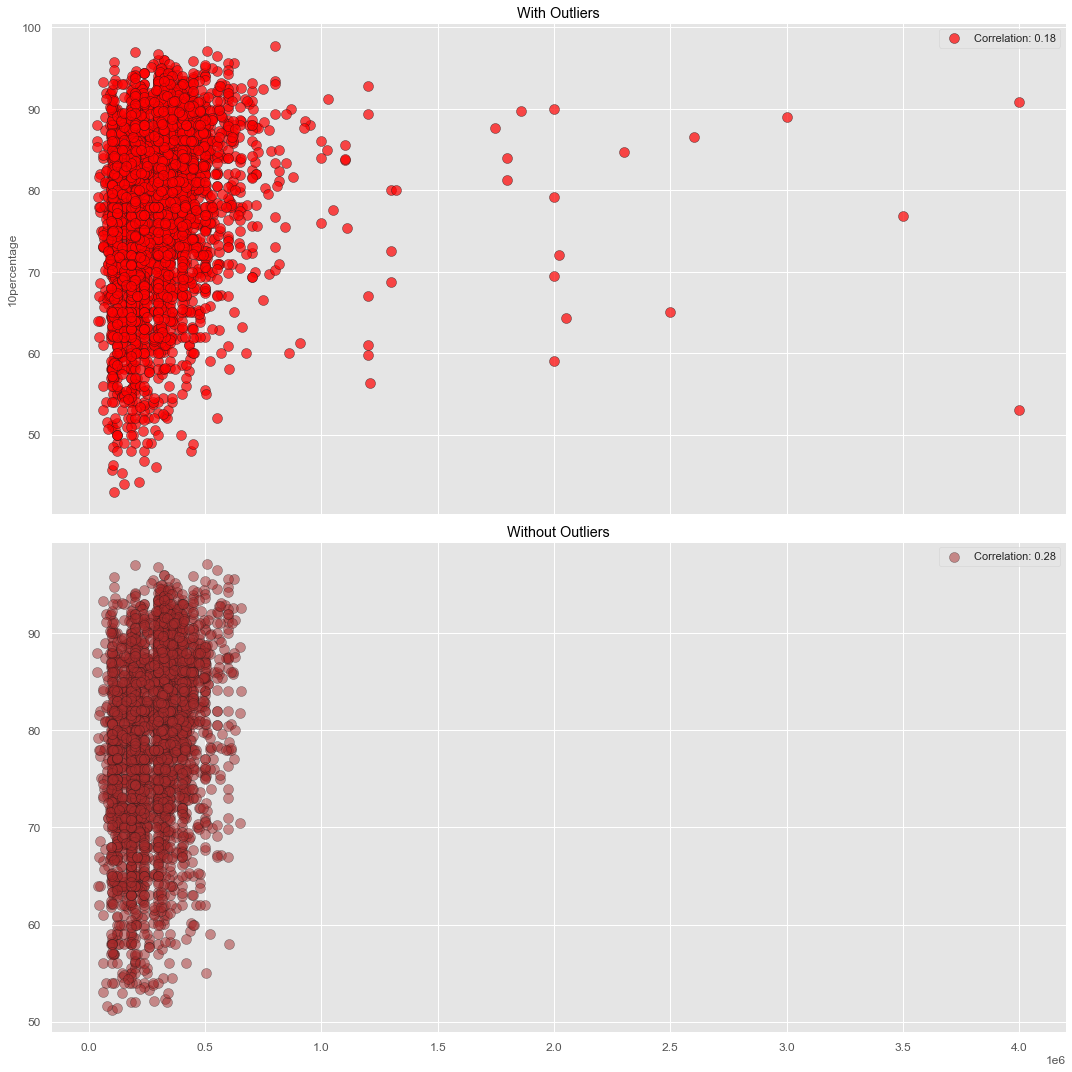

In [339]:
fig, ax = plt.subplots(2, 1, figsize = (15,15), sharex = True)

ax[0].scatter(df['salary'],df['10percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers')
ax[0].legend()


ax[1].scatter(df_copy['salary'],df_copy['10percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers')
ax[1].legend()


plt.tight_layout()
plt.show()



### RELATIONSHIP BETWEEN SALARY AND 12Percentage

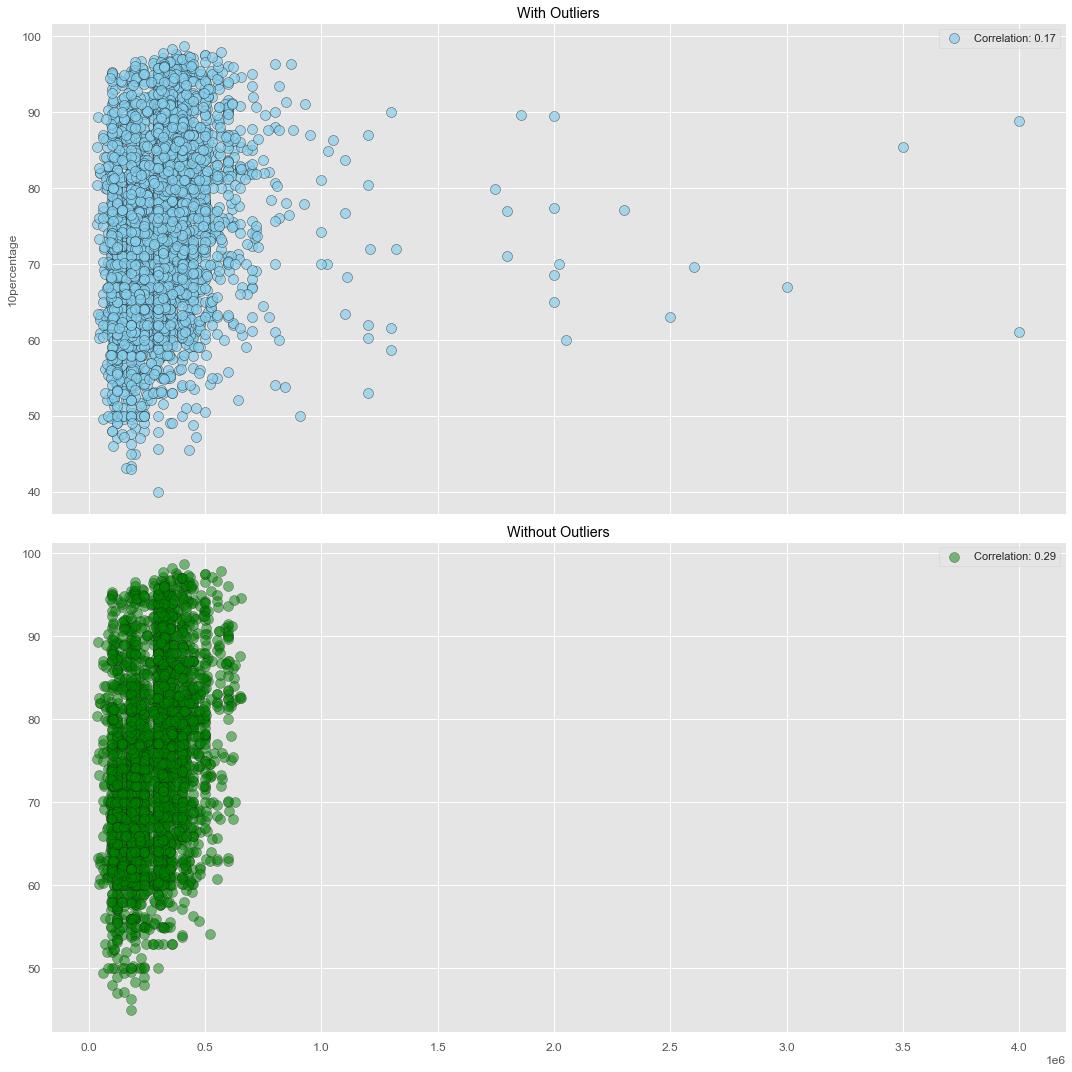

In [340]:
fig, ax = plt.subplots(2, 1, figsize = (15,15), sharex = True)

ax[0].scatter(df['salary'],df['12percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers')
ax[0].legend()


ax[1].scatter(df_copy['salary'],df_copy['12percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers')
ax[1].legend()


plt.tight_layout()
plt.show()


### RELATIONSHIP BETWEEN SALARY AND CollegeGPA

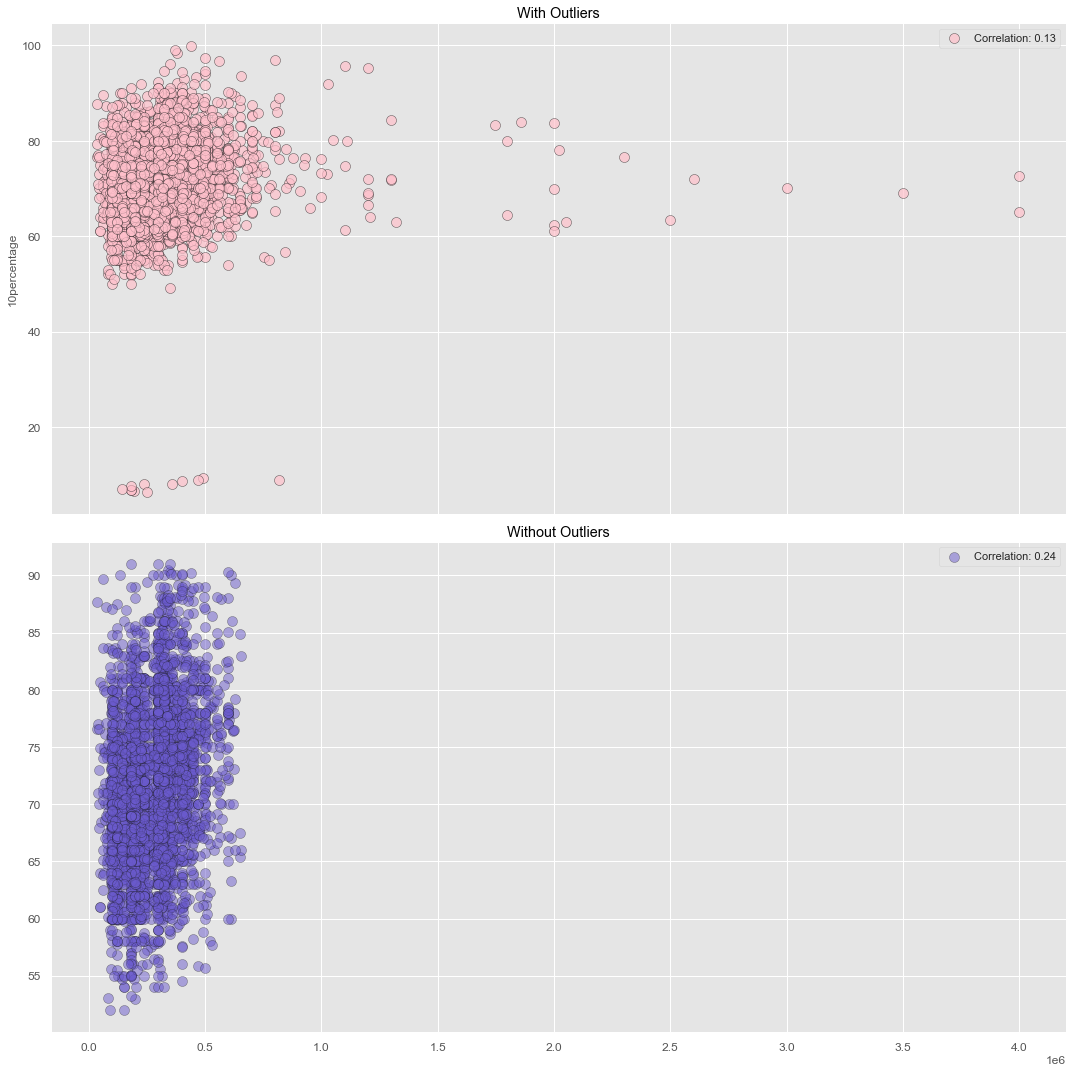

In [341]:
fig, ax = plt.subplots(2, 1, figsize = (15,15), sharex = True)

ax[0].scatter(df['salary'],df['collegegpa'],
               ec = 'k',
               color = 'pink',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['salary','collegegpa']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers')
ax[0].legend()


ax[1].scatter(df_copy['salary'],df_copy['collegegpa'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['salary','collegegpa']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers')
ax[1].legend()


plt.tight_layout()
plt.show()


### Relationship between Gender and Specialization

<AxesSubplot:xlabel='specialization'>

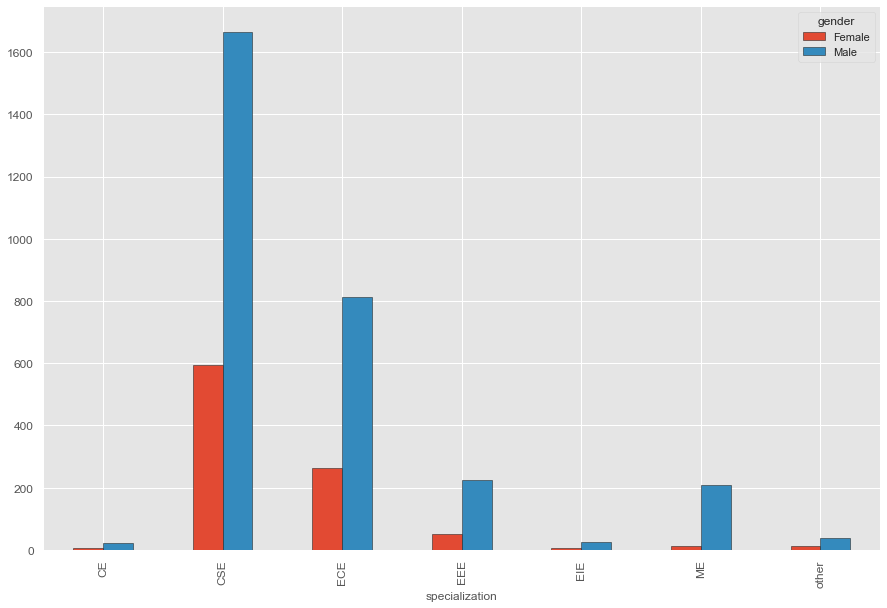

In [342]:
pd.crosstab(df['gender'],df['specialization']).T.plot(kind = 'bar',
                                                     ec = 'k',
                                                     figsize = (15,10))

- **Conclusions:**

There are more males than Females in each Specialization.

As usual ther number of Females who prefer Mechanical Engineering is very very low.

### CORELATION PLOT

<AxesSubplot:>

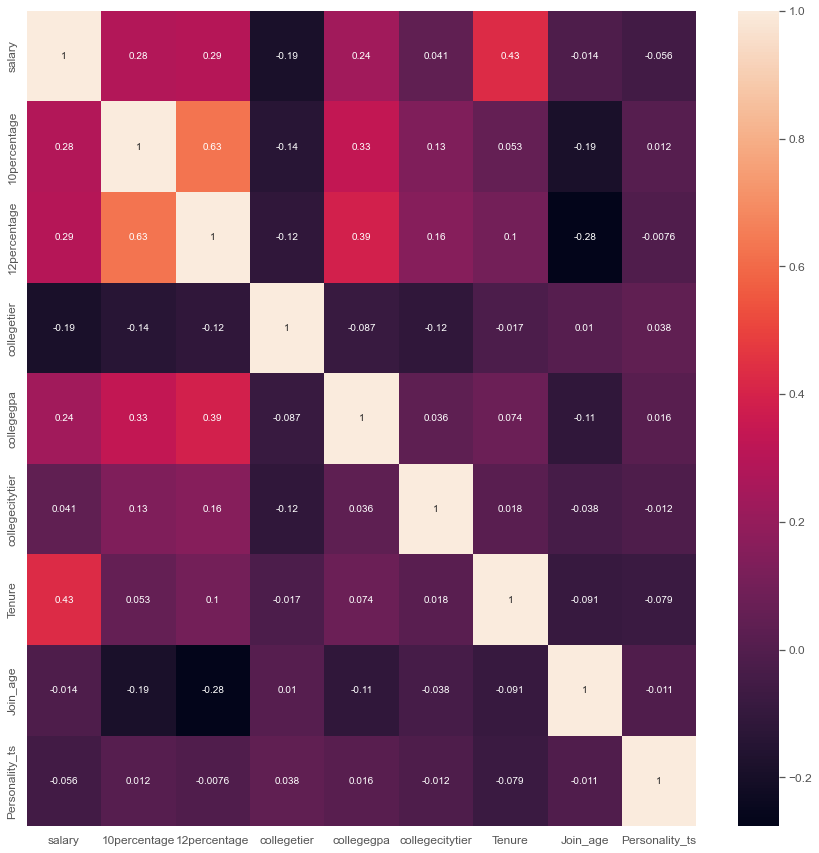

In [343]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(),annot=True)

### Relationship between Salary and Personality_Score

<AxesSubplot:xlabel='Personality_ts', ylabel='salary'>

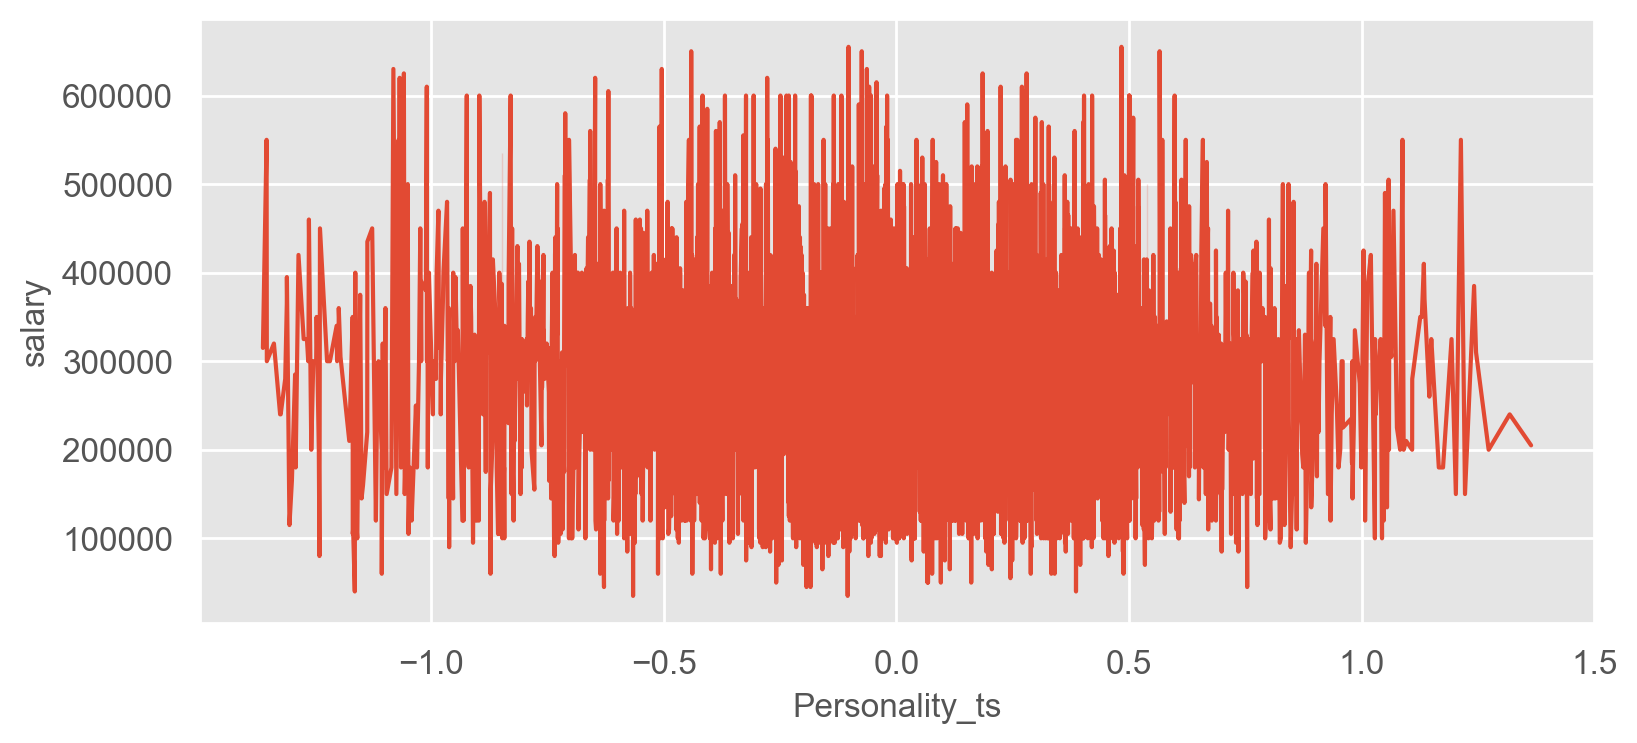

In [344]:
fig = plt.figure(figsize = (9,4), dpi = 200)
sns.lineplot('Personality_ts', 'salary', data = df_copy)


## FEATURE TRANSFORMATION

### Column Standardization for Numerical Features

In [345]:
df.columns

Index(['salary', 'jobcity', 'gender', '10percentage', '10board',
       '12percentage', '12board', 'collegetier', 'degree', 'specialization',
       'collegegpa', 'collegecitytier', 'collegestate', 'Tenure', 'Join_age',
       'designations', 'Personality_ts'],
      dtype='object')

In [346]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [347]:
# Standardizing Numerical Columns
scaled_sal = scaler.fit_transform(df_copy['salary'].values.reshape(-1,1))

# First 20 Scaled Values
print(scaled_sal[:20])

[[0.62096774]
 [0.75      ]
 [0.46774194]
 [0.26612903]
 [0.42741935]
 [0.42741935]
 [0.91129032]
 [0.31451613]
 [0.66935484]
 [0.37903226]
 [0.26612903]
 [0.42741935]
 [0.50806452]
 [0.46774194]
 [0.13709677]
 [0.46774194]
 [0.45967742]
 [0.26612903]
 [0.25      ]
 [0.48387097]]


In [348]:
# Standardizing 10th percentage Column
scaled_10 = scaler.fit_transform(df_copy['10percentage'].values.reshape(-1,1))

# First 10 Scaled Values (10 percentage column)
print(scaled_10[:10])

[[0.72081882]
 [0.74477352]
 [0.73606272]
 [0.58362369]
 [0.84320557]
 [0.75958188]
 [0.84494774]
 [0.56184669]
 [0.6489547 ]
 [0.70557491]]


In [349]:
# Standardizing 12th percentage Column
scaled_12 = scaler.fit_transform(df_copy['12percentage'].values.reshape(-1,1))

# First 10 Scaled Values (10 percentage column)
print(scaled_12[:10])

[[0.94599628]
 [0.74487896]
 [0.4320298 ]
 [0.59217877]
 [0.78212291]
 [0.41899441]
 [0.8603352 ]
 [0.50651769]
 [0.76350093]
 [0.46238361]]


### Column Standardization for Categorical Features

In [350]:
# One-hot Encoding of Gender column
dummies = pd.get_dummies(df[['gender']])
dummies

,gender_Female,gender_Male
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3992,0,1
3993,0,1
3995,0,1
3996,1,0


In [351]:
df1 = pd.concat([df,dummies],axis='columns')
df1.head()

,salary,jobcity,gender,10percentage,10board,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,Tenure,Join_age,designations,Personality_ts,gender_Female,gender_Male
0,420000,Bangalore,Female,84.3,State,95.8,State,2,Bachelors,CSE,78.00,0,Andhra Pradesh,3,22,others,0.644560,1,0
1,500000,Indore,Male,85.4,State,85.0,State,2,Bachelors,ECE,70.06,0,Madhya Pradesh,2,24,manager,0.328220,0,1
2,325000,Chennai,Female,85.0,State,68.2,State,2,Bachelors,CSE,70.00,0,Uttar Pradesh,1,22,engineer,0.390060,1,0
3,1100000,Gurgaon,Male,85.6,State,83.6,State,1,Bachelors,CSE,74.64,1,Delhi,4,22,others,-0.256000,0,1
4,200000,Manesar,Male,78.0,State,76.8,State,2,Bachelors,ECE,73.90,0,Uttar Pradesh,1,23,others,-0.453574,0,1


In [352]:
cleaned_df = df1.drop(['gender',],axis='columns')
cleaned_df.head()

,salary,jobcity,10percentage,10board,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,Tenure,Join_age,designations,Personality_ts,gender_Female,gender_Male
0,420000,Bangalore,84.3,State,95.8,State,2,Bachelors,CSE,78.00,0,Andhra Pradesh,3,22,others,0.644560,1,0
1,500000,Indore,85.4,State,85.0,State,2,Bachelors,ECE,70.06,0,Madhya Pradesh,2,24,manager,0.328220,0,1
2,325000,Chennai,85.0,State,68.2,State,2,Bachelors,CSE,70.00,0,Uttar Pradesh,1,22,engineer,0.390060,1,0
3,1100000,Gurgaon,85.6,State,83.6,State,1,Bachelors,CSE,74.64,1,Delhi,4,22,others,-0.256000,0,1
4,200000,Manesar,78.0,State,76.8,State,2,Bachelors,ECE,73.90,0,Uttar Pradesh,1,23,others,-0.453574,0,1


In [353]:
# Converting categorical column to numerical
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df_copy[["jobcity", "degree","specialization", "designations"]] = enc.fit_transform(df_copy[["jobcity", "degree","specialization", "designations"]])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3173 entries, 0 to 3997
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   salary           3173 non-null   int64  
 1   jobcity          2792 non-null   float64
 2   gender           3173 non-null   object 
 3   10percentage     3173 non-null   float64
 4   10board          3173 non-null   object 
 5   12percentage     3173 non-null   float64
 6   12board          3173 non-null   object 
 7   collegetier      3173 non-null   int64  
 8   degree           3173 non-null   float64
 9   specialization   3173 non-null   float64
 10  collegegpa       3173 non-null   float64
 11  collegecitytier  3173 non-null   int64  
 12  collegestate     3173 non-null   object 
 13  Tenure           3173 non-null   int64  
 14  Join_age         3173 non-null   int64  
 15  designations     3173 non-null   float64
 16  Personality_ts   3173 non-null   float64
dtypes: float64(8),

**===========================================================================================================================**

                                    **DATA MODELLING AND EVALUATION TO FOLLOW** 